![UNIR](https://www.unir.net/wp-content/uploads/2014/10/logo.png)
### Máster en Inteligencia Artificial. 
**Asignatura:** _Sistemas Cognitivos Artificiales_

**Alumno:** _Luisa Sánchez Avivar_

**Fecha:** _5 Mayo 2020_

---

# ACTIVIDAD 1: Redes neuronales con Keras

**Objetivo:** Crear una primera red sencilla con Keras y utilizar otros conceptos avanzados vistos en teoría.
___

# Primera parte: Introducción a las redes neuronales con Keras

En esta primera parte, vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados** (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [128]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

import matplotlib.pyplot as plt

Primero, vamos a obtener los datos. Por suerte para nosotros, estos pueden ser descargados directamente desde Keras, por lo que no tendremos que preocuparnos de tratar con ficheros.

In [129]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Acto seguido, normalizamos esos datos de manera similar a como hemos visto con MNIST, obteniendo valores entre 0 y 1. Este paso es muy importante para el correcto funcionamiento de nuestra red.

In [130]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

**Training Set**

In [131]:
print("Tiene " + str(len(x_train)) + " imágenes donde cada imágen está representada por 28 x 28 píxeles")
x_train.shape

Tiene 60000 imágenes donde cada imágen está representada por 28 x 28 píxeles


(60000, 28, 28)

**Test Set**

In [132]:
print("Tiene " + str(len(x_test)) + " imágenes donde cada imágen está representada por 28 x 28 píxeles")
x_test.shape

Tiene 10000 imágenes donde cada imágen está representada por 28 x 28 píxeles


(10000, 28, 28)

*Tu respuesta aquí*

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [133]:
y_train = keras.utils.to_categorical(y_train)
# print(x_train)
# print(y_train)
n_classes = len(y_train[1])
print(y_train.shape)

(60000, 10)


**X_train** y **y_train** son arrays de mi dataset de entrenamiento. *x_train* contiene imágenes de 28x28 píxeles donde cada valor está comprendido en el rango [0, 255] mientras que *y_train* son las clases que representan el dataset (las etiquetas con las que clasifica cada ítem): 10 en total. Si lo imprimimos vemos que es un array de enteros con valores comprendidos de 0 a 9. Echándole un ojo a [los datos](https://github.com/zalandoresearch/fashion-mnist) vemos que las clases están mapeadas como podemos ver aquí:

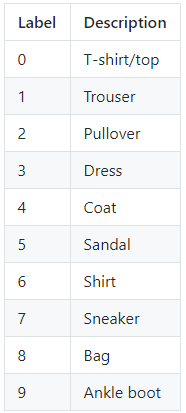

Ahora tiene un poco más de sentido: cada valor en *y_train* es una etiqueta que corresponde al nombre de una prenda de ropa (aparentemente estos nombres no están en el dataset que se maneja). 

In [150]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Vamos a **visualizar** una imagen de ejemplo. Prueba tu mismo a cambiar la imagen en uso para explorar el dataset visualmente ejecutando el siguiente código:

In [134]:
def visualize_example(x):
    plt.figure()
    plt.imshow(x)
    plt.colorbar()
    plt.grid(False)
    plt.show()

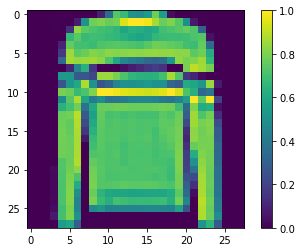

In [135]:
visualize_example(x_train[5])

In [136]:
def visualize_sample(size):
    plt.figure(figsize=(5,5))
    cols = size / 5
    for i in range(size):
        plt.subplot(5,cols, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.show()
    

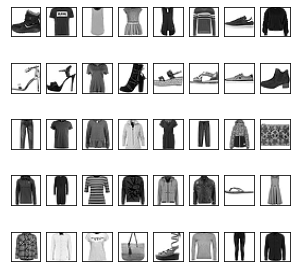

In [137]:
visualize_sample(40)

## 2. Entrenamiento de una red neuronal simple

**Pregunta 2 *(3.5 puntos)***. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Dos hidden layers de tamaños 128 y 64, utilizando unidades **sigmoid**
* Optimizador **sgd**.
* Durante el entrenamiento, la red tiene que mostrar resultados de **loss** y **accuracy** por cada epoch.
* La red debe entrenar durante **20 epochs** y batch size de **64**.
* La última capa debe de ser una capa **softmax**.

Tu red tendría que ser capaz de superar fácilmente 60% de accuracy.

### 2.1 Construcción del Modelo
Construimos el modelo especificando a Keras que lo vamos a crear de manera secuencial.
   La primera capa no tiene parámetros que aprender, simplemente reformatea los datos.
A continuación definimos como input dos hidden layers definidas con *Dense* para especificar que son capas *fully conected*. La primera tiene 128 neuronas y la segunda 64 donde usamos *sigmoid* como función de activación.
La última capa toma tantos nodos como número de clases, de manera que cada nodo tomará una puntuación que indica a qué clase pertenece una imagen determinada. En esta *output layer* usamos *softmax* como función de activación la cual se usa para hacer predicciones en modelos multiclase. Esto devolverá la probabilidad de cada una de las clases dentro de un grupo de clases con la que haya puntuado más alto.

In [138]:
model = Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(n_classes, activation='softmax')
])

model.summary()

### 2.2 Compilación del Modelo
Antes de entrenar el modelo debemos definir:
- **Optimizer** Sgd (Stochastic Gradient Descent)
- **Loss** En coherencia con la función de activación en la output layer, *categorical_crossentropy* especifica que tenemos un modelo **multiclase**

In [139]:
model.compile(
    optimizer = 'sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### 2.3 Entrenamiento del Modelo
Notamos que antes de entrenar el modelo, debemos categorizar las *etiquetas* cmo ya hice en:
```
y_train = keras.utils.to_categorical(y_train)
```

In [140]:
model.fit(x_train, y_train, epochs=20, batch_size=64)

Epoch 1/20
60000/60000 [==============================] - 2s 34us/step - loss: 2.2249 - accuracy: 0.3853
Epoch 2/20
60000/60000 [==============================] - 2s 35us/step - loss: 1.9020 - accuracy: 0.5466
Epoch 3/20
60000/60000 [==============================] - 2s 33us/step - loss: 1.4925 - accuracy: 0.5984
Epoch 4/20
60000/60000 [==============================] - 2s 34us/step - loss: 1.2300 - accuracy: 0.6387
Epoch 5/20
60000/60000 [==============================] - 2s 36us/step - loss: 1.0751 - accuracy: 0.6692
Epoch 6/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.9717 - accuracy: 0.6943
Epoch 7/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.8941 - accuracy: 0.7117
Epoch 8/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.8321 - accuracy: 0.7260
Epoch 9/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.7822 - accuracy: 0.7366
Epoch 10/20
60000/60000 [==============================

## 3. Evaluación del modelo en datos de test

Una vez hemos entrenado nuestro modelo, vamos a evaluarlo en los datos de test de Fashion MNIST.

**Pregunta 3.1 *(0.5 puntos)***. Utilizando el modelo recién entrenado, obtener la accuracy resultante en el dataset de test.

In [141]:
y_test = keras.utils.to_categorical(y_test)
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print('Accuracy: ' + str(accuracy))

Accuracy: 0.7925000190734863


In [144]:
model.evaluate(
  x_test,
  y_test
)

10000/10000 [==============================] - 0s 20us/step


[0.579236515712738, 0.7925000190734863]

**Pregunta 3.2 *(0.5 puntos)***. Utilizando el método **predict** de Keras, realizar predicciones para los datos de test. Por cada predicción resultante, ¿qué significan los números que obtenemos al hacer predict? ¿Cómo podemos obtener el valor de la clase resultante? (recordar que estamos utilizando una capa softmax para clasificar).

In [187]:
def visualize_probabilities(img_index, label_ground_truth):
    plt.xticks(range(10), class_names, rotation=45)
    thisplot = plt.bar(range(10), predictions[img_index], color="#777777")
    predicted_label = np.argmax(predictions[img_index])
    thisplot[predicted_label].set_color('red')
    thisplot[label_ground_truth].set_color('blue')

[8.7824206e-05 1.5406546e-04 2.1492744e-04 1.9025887e-04 2.7522061e-04
 2.0292258e-01 2.3843984e-04 2.5104630e-01 1.5377248e-02 5.2949303e-01]

Ankle boot
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


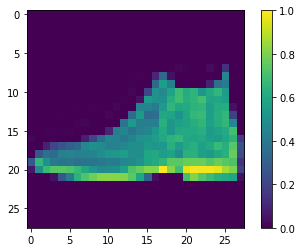

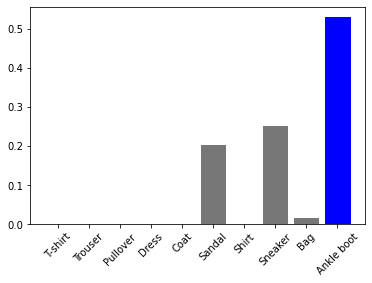

In [211]:
import numpy as np
img_to_predict = 0

# Hacemos la predicción de las imágenes de test
predictions = model.predict(x_test)

# Cogemos las predicciones vinculadas a la primera imagen (por ejemplo)
first_img_prediction = predictions[img_to_predict]
test_prediction = np.argmax(first_img_prediction)
print(first_img_prediction)

# Imprimimos la clase más probable: la que puntúa más alto
print('\n' + class_names[test_prediction])

#Comprobamos con cuál debería ser
print(y_test[test_prediction])

#Finalmente vemos: La imagen que queremos probar, la clase que se le predice y las probabilidades asociadas
visualize_example(x_test[img_to_predict])
visualize_probabilities(img_to_predict, test_prediction)



El array que obtenemos al principio al imprimir la variable *first_img_prediction* son las predicciones asociadas a la imagen que estamos probando en el código; Es decir, las probabilidades asociadas a cada clase que intenta predecir a cuál de ellas pertenece la imágen. *predictions* contendrá por lo tanto una matriz donde cada valor son ese conjunto de probabilidades asociadas a clada clase por cada imagen.
   